In [1]:
# Exemplo 2 - Classificar se um email é spam ou não
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/dadosspam.csv')

In [5]:
df.head() # exibe as 4 primeiras linhas do dataset

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


In [6]:
# Dividindo os dados em x e y para separar os dados
x = df.drop('spam', axis=1) # exclui a coluna spam e armazena as outras colunas do dataset
y = df['spam'] # armazena s coluna spam

In [7]:
# importando a biblioteca para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split # bilbioteca para dividir os dados de treino dos dados de teste

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) # Random state garante reprodutibilidade do modelo em outras máquinas

In [9]:
# importa as bibliotecas para machine learning
from sklearn.svm import SVC # importa a biblioteca svm e o modelo SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report

In [10]:
# Criando modelo SVM
model = SVC(kernel='linear') # cria o modelo svm

In [11]:
# Treino do modelo
model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
# Fazendo predições
y_prev = model.predict(x_test)
y_prev # exibe as previsões

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [13]:
acc = accuracy_score(y_test, y_prev)
prec = precision_score(y_test, y_prev)
print(f'Acurácia:{acc}')
print(f'Precisão: {prec}')
print(f'f1_score:{f1_score}')

Acurácia:0.9866666666666667
Precisão: 1.0
f1_score:<function f1_score at 0x000001240DA551C0>


In [14]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_prev)
cm

array([[149,   0],
       [  4, 147]])

In [15]:
# importando as bibliotecas para plotar a matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'Previsão')

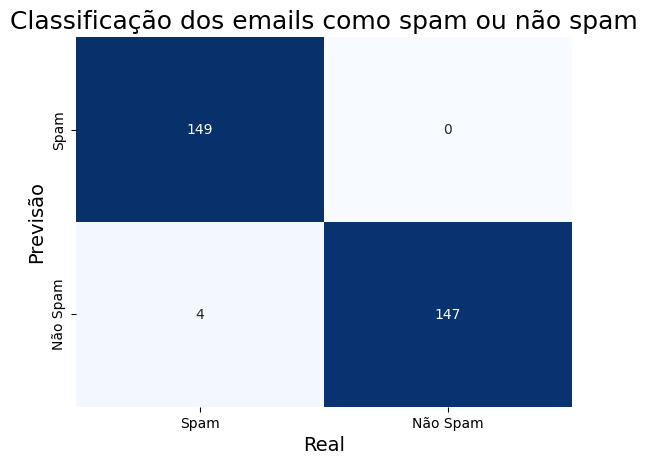

In [17]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Spam', 'Não Spam'], yticklabels=['Spam', 'Não Spam'])
plt.title('Classificação dos emails como spam ou não spam', fontsize=18)
plt.xlabel('Real', fontsize=14)
plt.ylabel('Previsão', fontsize=14)

In [18]:
# Realizando a contagem das predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count
print(f'Spam:{spam_count}')
print(f'Não Spam: {non_spam_count}')

Spam:147
Não Spam: 153


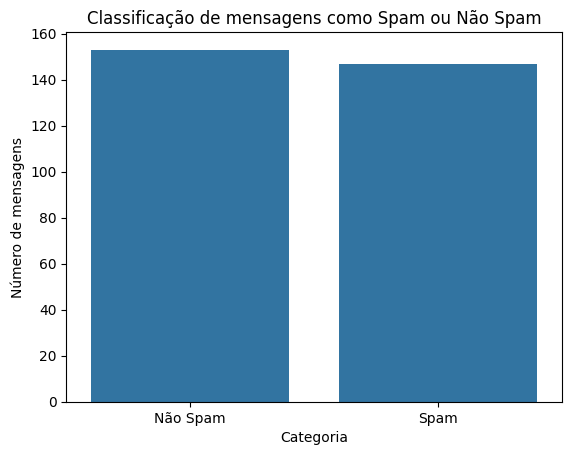

In [20]:
# Grafico de barras
plt.Figure(figsize=(8,6))
sns.barplot(x=['Não Spam', 'Spam'], y=[non_spam_count, spam_count], hue_norm='viridis')
#Palete cor do heatmap
plt.xlabel('Categoria')
plt.ylabel('Número de mensagens')
plt.title('Classificação de mensagens como Spam ou Não Spam')
plt.grid(False)
